#               Analysis of "Anime DataSet Of 2022"
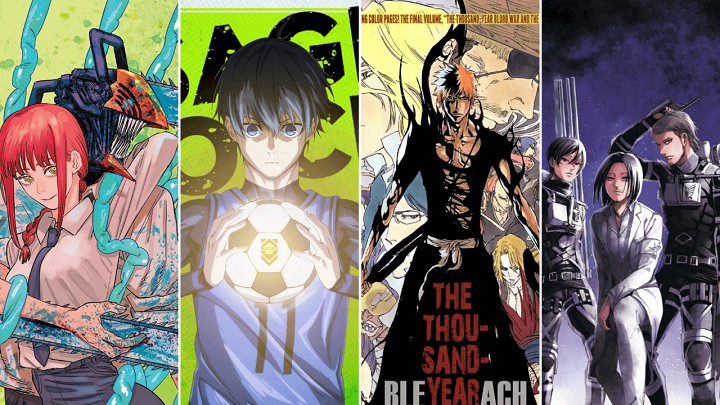

# ABOUT

Anime is hand-drawn and computer-generated animation originating from Japan.
The term anime [a·nuh·mei] is a Japanese colloquialism used as an abbreviation for the term “animation.” Generally in Japan, the word anime (written アニメ) is synonymous with animation of any kind from anywhere. Internationally, however, anime is typically referred to as animation that is produced from Japan. The distinction between anime and cartoons is more cultural than it is technical and its origins date over 100 years ago.

# <i>RESOURCES OF THE DATASETS USED IN THIS PROJECT</i>

### <li><strong>Anime.csv (contains all information about the Anime released in 2022)</strong> -  <a href="https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022">Source</a><br>
The given dataset was taken from the dataset bundle present in Kaggle Datasets.
### <li> <strong>Anime.csv (contains all informations about anime name rating viewrs)</strong> -
This Anime.csv data has been scraped from Anime planet using <a href="https://www.anime-planet.com/">Tool Source</a>.
Wikedpedia Source - <a href="https://www.studiobinder.com/blog/what-is-anime-definition-examples/">Click</a>
    

    

# <i>USED LIBRARIES/PACKAGES IN THIS PROJECT</i>

* __jovian__ (to upload, save and share the contents of my notebook)
* __numpy__ (as np is one of the very famous packages for working with arrays in python)
* __pandas__ (Is greatly used in analysis of data and making dataframe)
* __matplotlib__ (Lets make our Analyzation fun and interative with the visualization library matplotlib)
* __seaborn__ (Adding more colours into matplotlib visualization)

## Downloading the Dataset 
### Package Install And Import 


In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

First, we wil install and import necessary packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

Let us save and upload our work to Jovian before continuing.

In [3]:
project_name = "Anime"

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ishit239/anime" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ishit239/anime


'https://jovian.ai/ishit239/anime'

## Data Preparation and Cleaning

>  <strong>Let's convert these csv files into pandas dataframe for our future analysis.</strong><br>
>  <strong>We also have to check whether any null value present inside the dataframe or not before analysis.</strong>

In [7]:
anime=pd.read_csv("Anime.csv")
anime.head(10)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."
5,6,Jujutsu Kaisen,NaN,TV,24.0,MAPPA,Fall,"Action, Horror, Shounen, Curse, Exorcists, Mon...",4.56,2020.0,2021.0,'Although Yuji Itadori looks like your average...,Explicit Violence,"Jujutsu Kaisen 0, Jujutsu Kaisen","Jujutsu Kaisen (2018), Juju Sanpo, Eve: Kaikai...","Megumi Fushiguro : Yuuma Uchida, Nobara Kugisa...","Gege Akutami : Original Creator, Seong-Hu Park..."
6,7,Attack on Titan The Final Season: Part II,Shingeki no Kyojin The Final Season: Part II,TV,NaN,MAPPA,Winter,"Action, Drama, Fantasy, Horror, Shounen, Dark ...",4.56,2022.0,NaN,'Continuation of\xa0Attack on Titan The Final ...,NaN,Attack on Titan,"Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Jun Shishid..."
7,8,Attack on Titan The Final Season,Shingeki no Kyojin The Final Season,TV,16.0,MAPPA,Winter,"Action, Drama, Fantasy, Horror, Shounen, Dark ...",4.55,2020.0,2021.0,"""It's been four years since the Scout Regiment...","Explicit Violence,, Mature Themes,, Physical A...",Attack on Titan,"Attack on Titan, Attack on Titan 2nd Season, A...","Eren Jaeger : Yuuki Kaji, Armin Arlelt : Marin...","Hajime Isayama : Original Creator, Jun Shishid..."
8,9,Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...,Kimetsu no Yaiba Movie: Mugen Ressha-hen,Movie,NaN,ufotable,NaN,"Action, Drama, Fantasy, Shounen, Demons, Histo...",4.54,2020.0,NaN,'Tanjirou\xa0and the group have completed thei...,"Mature Themes,, Suicide,, Violence","Gotouge Koyoharu Tanpenshuu, Demon Slayer: Kim...","Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuo

In [8]:
anime.shape

(18495, 17)

First, we are replacing the whitespace in the column names by an underscore to avoid any problem when calling columns.

In [9]:
anime.columns = anime.columns.str.replace(' ', '_')

In [10]:
anime=anime.drop(['staff','Content_Warning'],axis=1)#droping unnecessary columns
anime=anime.rename(columns={'Related_Mange':'Manga'}) #renaming 'Related_Manga' to Manga for easy use
anime


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Manga,Related_anime,Voice_actors
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,NaN,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,NaN,TV,108.0,NaN,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,NaN,TV,13.0,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,NaN,TV,NaN,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN


In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            18495 non-null  int64  
 1   Name            18495 non-null  object 
 2   Japanese_name   7938 non-null   object 
 3   Type            18495 non-null  object 
 4   Episodes        9501 non-null   float64
 5   Studio          12018 non-null  object 
 6   Release_season  4116 non-null   object 
 7   Tags            18095 non-null  object 
 8   Rating          15364 non-null  float64
 9   Release_year    18112 non-null  float64
 10  End_year        2854 non-null   float64
 11  Description     18491 non-null  object 
 12  Manga           7627 non-null   object 
 13  Related_anime   10063 non-null  object 
 14  Voice_actors    15309 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 2.1+ MB


Here We Can see that there are 18494 entries and 15 columns

In [12]:
## finding nunique values in the data frame
anime.nunique()

Rank              18495
Name              18443
Japanese_name      7902
Type                  8
Episodes            205
Studio              745
Release_season        4
Tags              11799
Rating              289
Release_year        103
End_year             60
Description       10012
Manga              4151
Related_anime      9451
Voice_actors      13615
dtype: int64

In [13]:
anime.isnull().sum()

Rank                  0
Name                  0
Japanese_name     10557
Type                  0
Episodes           8994
Studio             6477
Release_season    14379
Tags                400
Rating             3131
Release_year        383
End_year          15641
Description           4
Manga             10868
Related_anime      8432
Voice_actors       3186
dtype: int64

In [14]:
# Replacing some NAN value of Anime in Japanese_Name as Chinese because they are all chinese released
anime['Japanese_name'].replace(np.NaN,'Chinese',inplace=True)

anime

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Manga,Related_anime,Voice_actors
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,Chinese,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,Chinese,TV,108.0,NaN,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,Chinese,TV,13.0,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,Chinese,TV,NaN,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN


In [15]:
# Replacing some NAN value of Anime in Studio as Chinese Studio because they are all chinese Built
anime['Studio'].replace(np.NaN,'Chinese Studio',inplace=True)

anime

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Manga,Related_anime,Voice_actors
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,Chinese,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,Chinese,TV,108.0,Chinese Studio,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,Chinese,TV,13.0,Chinese Studio,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,Chinese,TV,NaN,Chinese Studio,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN


In [16]:
#Filling remaining null values with 0
anime.fillna(0)


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Manga,Related_anime,Voice_actors
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,0.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,0.0,'Tanjiro and his friends accompany the Hashira...,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,0.0,'The final arc of Fruits Basket.',"Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,0,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,0.0,'The third season of Mo Dao Zu Shi.',Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,0.0,'The battle to retake Wall Maria begins now! W...,"Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,Chinese,Web,2.0,Sparkly Key Animation Studio,0,"Action, Ancient China, Chinese Animation, Hist...",0.00,2020.0,0.0,Special episodes of Qin Shi Mingyue: Canghai H...,0,Qin Shi Mingyue: Canghai Hengliu,0
18491,18492,Yi Tang Juchang: Sanguo Yanyi,Chinese,TV,108.0,Chinese Studio,0,Chinese Animation,0.00,2010.0,0.0,No synopsis yet - check back soon!,0,0,0
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,Chinese,TV,13.0,Chinese Studio,0,"Chinese Animation, Family Friendly, Short Epis...",0.00,2020.0,0.0,No synopsis yet - check back soon!,0,0,0
18493,18494,Chengshi Jiyi Wo Men de Jieri,Chinese,TV,0.0,Chinese Studio,0,"Chinese Animation, Family Friendly, Short Epis...",0.00,2020.0,0.0,No synopsis yet - check back soon!,0,0,0


In [17]:
anime.isnull().sum()

Rank                  0
Name                  0
Japanese_name         0
Type                  0
Episodes           8994
Studio                0
Release_season    14379
Tags                400
Rating             3131
Release_year        383
End_year          15641
Description           4
Manga             10868
Related_anime      8432
Voice_actors       3186
dtype: int64

In [18]:
for i in anime.columns:
    anime[i]=anime[i].replace(np.nan,0)
anime.isnull().values.any()

False

anime.isnull().values.any() gives boolean value 'False' it means there is no null value present inside the anime dataframe.

## Exploratory Analysis and Visualization

First Let See How Many Anime Are There In The Dataset



In [19]:
Number_of_Anime = anime.shape[0]

print('There are {} Anime in this dataset.'.format(Number_of_Anime))

There are 18495 Anime in this dataset.


To Calculate the basic statistics of the dataset,we are using the describe function

In [20]:
anime.describe()

,Rank,Episodes,Rating,Release_year,End_year
count,18495.00000,18495.000000,18495.000000,18495.000000,18495.000000
mean,9248.00000,10.747175,2.787146,1964.968694,309.280725
std,5339.19095,29.167472,1.310143,286.143318,724.070909
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,4624.50000,0.000000,2.860000,2000.000000,0.000000
50%,9248.00000,1.000000,3.270000,2011.000000,0.000000
75%,13871.50000,12.000000,3.530000,2017.000000,0.000000
max,18495.00000,800.000000,4.600000,2023.000000,2022.000000


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Additionally we can plot the quickly plot all columns against each other to see potential connections and distributions using the *pairplot* function from seaborn library.

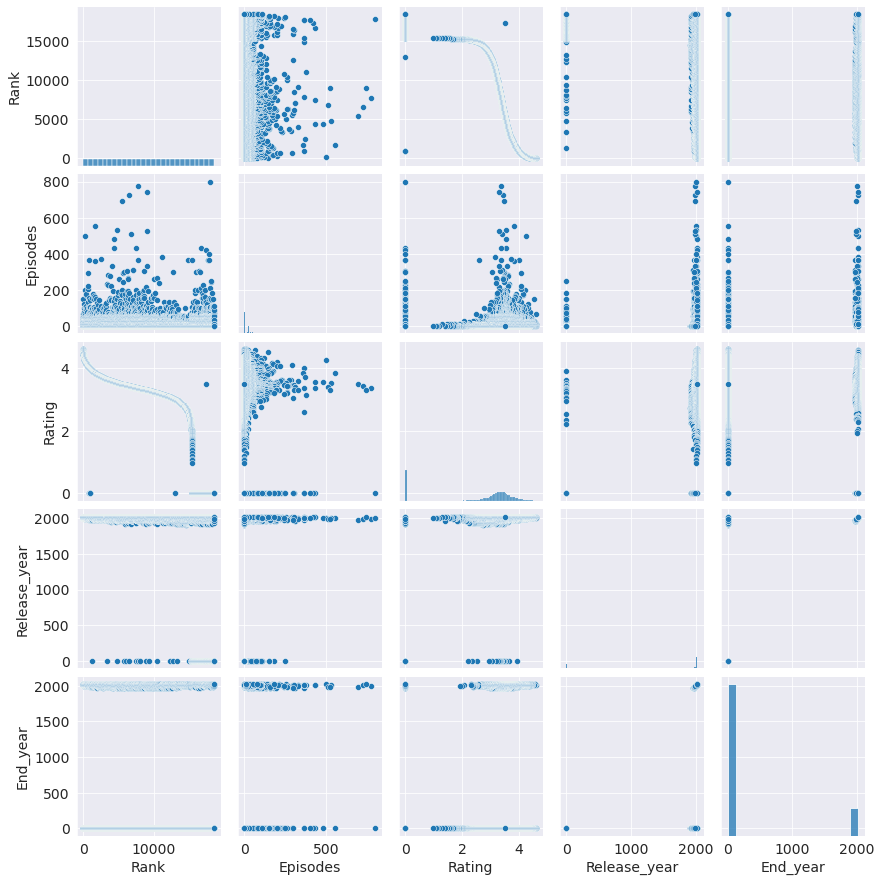

In [22]:
sns.pairplot(anime);

In [23]:
## Lets find how may tv shows,movies and other type are available in the dataset
## value_count() Return a Series containing counts of unique values.


anime['Type'].value_counts()

TV       5446
Movie    3577
Web      2488
OVA      2235
Music    2165
Other     990
DVD S     911
TV Sp     683
Name: Type, dtype: int64

### Visual Representation of the content

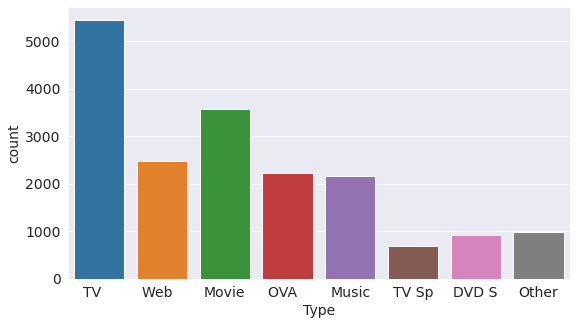

In [24]:
sns.countplot(x='Type', data=anime);

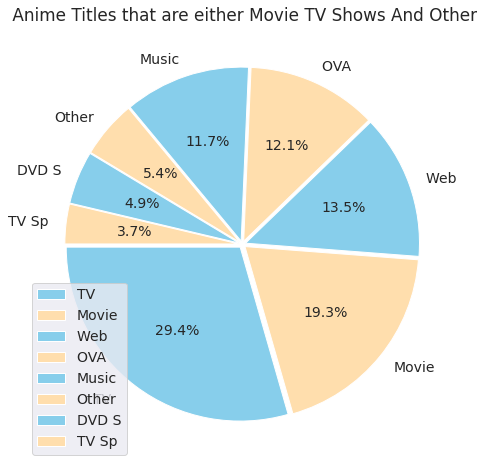

In [25]:
plt.figure(figsize=(16,8))
plt.title(" Anime Titles that are either Movie TV Shows And Other")
g = plt.pie(anime.Type.value_counts(), explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,), labels=anime.Type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Below is the most common ratingS Anime

,Rating,Nbr
0,0.00,3131
1,3.35,212
2,3.39,202
3,3.41,201
4,3.28,196
...,...,...
285,1.96,1
286,2.02,1
287,2.12,1
288,2.10,1


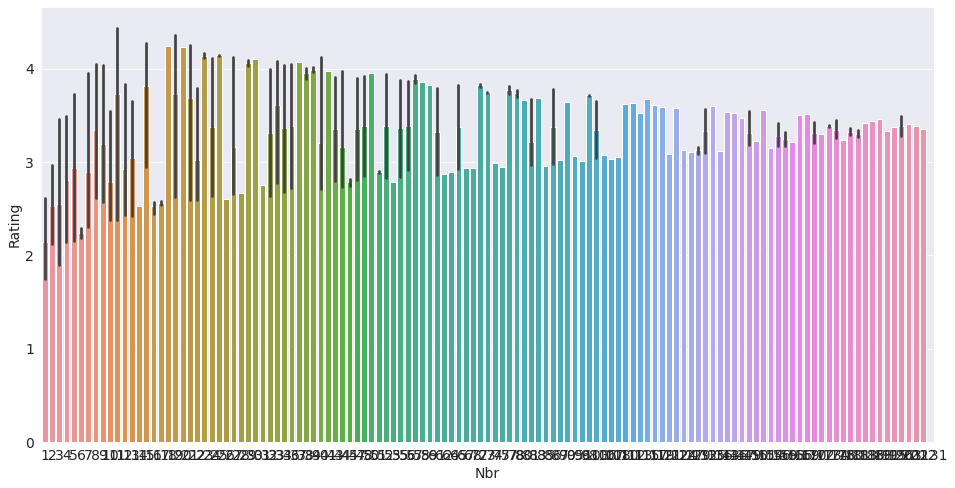

In [26]:
## below is  most common ratings TV_MA
plt.figure(figsize=(16,8))
anime_rating = anime['Rating'].value_counts()
anime_rating = pd.DataFrame(anime_rating).reset_index()
anime_rating.columns = ['Rating','Nbr']
sns.barplot(y = 'Rating',x = 'Nbr', data=anime_rating)
anime_rating

Let us save and upload our work to Jovian before continuing

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ishit239/anime" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ishit239/anime


'https://jovian.ai/ishit239/anime'

## Asking and Answering Questions

Lets Get Some Insight OF The Data



## Q1 What are The Manga Which Have Most Content in The Data Frame?

In [29]:
## we use groupby() ,count() and sort_values() to get the result
## Groupby()  used to group large amounts of data and compute operations on these groups.
## count() counts the number of values in each column.
## sort_values() Sort by the values along either axis

Top_Anime = anime.groupby('Manga').count().sort_values('Type',ascending=False)

Top_Anime.reset_index(inplace=True)

Top_Anime.head(10)


,Manga,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Related_anime,Voice_actors
0,0,10868,10868,10868,10868,10868,10868,10868,10868,10868,10868,10868,10868,10868,10868
1,"Crayon Shin-chan, Shin Crayon Shin-chan, Crayo...",33,33,33,33,33,33,33,33,33,33,33,33,33,33
2,"Lupin III, Lupin Kozou",30,30,30,30,30,30,30,30,30,30,30,30,30,30
3,"Doraemon, Daichohen Doraemon, The Doraemons: D...",25,25,25,25,25,25,25,25,25,25,25,25,25,25
4,"Pokemon: The Electric Tale of Pikachu, Pokémon...",24,24,24,24,24,24,24,24,24,24,24,24,24,24
5,"Magic Kaitou, Case Closed, Detective Conan: To...",22,22,22,22,22,22,22,22,22,22,22,22,22,22
6,One Piece,20,20,20,20,20,20,20,20,20,20,20,20,20,20
7,"Codename: Sailor V, Sailor Moon, Pretty Guardi...",20,20,20,20,20,20,20,20,20,20,20,20,20,20
8,"Kitaro, Gegege no Kitarou: Youkai Sen Monogata...",19,19,19,19,19,19,19,19,19,19,19,19,19,19
9,"Prince of Tennis, Shin Tennis no Ouji-sama",19,19,19,19,19,19,19,19,19,19,19,19,19,19


#### Q2: Which of the following anime has more rating as per views

In [30]:
anime.sort_values(by='Rating', ascending=False).head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Manga,Related_anime,Voice_actors
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,0.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,0.0,'Tanjiro and his friends accompany the Hashira...,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,0.0,'The final arc of Fruits Basket.',"Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,0,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,0.0,'The third season of Mo Dao Zu Shi.',Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,0.0,'The battle to retake Wall Maria begins now! W...,"Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu..."


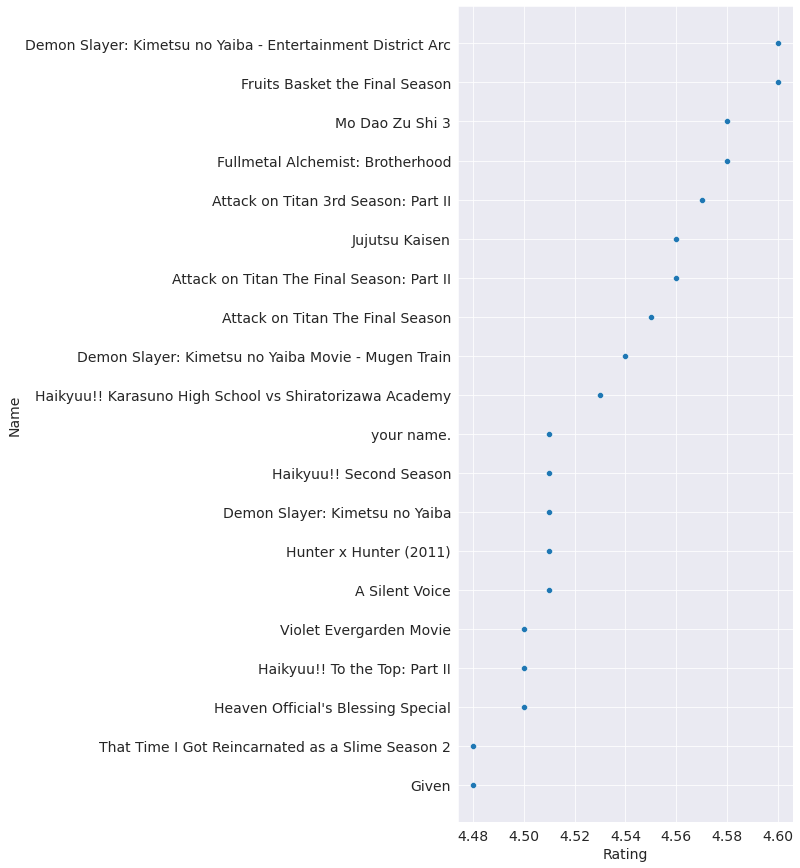

In [62]:
plt.figure(figsize=(6, 15))

sns.scatterplot(anime.Rating,anime.Name.head(20));

Here Is the plot showing the rating of the anime 

#### Q3: What Are the top 10 Studio Have More Anime  ?

In [32]:
top_listed_in=anime["Studio"].value_counts()
top_listed_in.head(10)

Chinese Studio                    6477
Toei Animation                     737
Sunrise                            476
J.C.Staff                          382
TMS Entertainment                  364
MADHOUSE                           357
Production I.G                     279
Studio DEEN                        278
Shanghai Animation Film Studio     252
OLM                                249
Name: Studio, dtype: int64

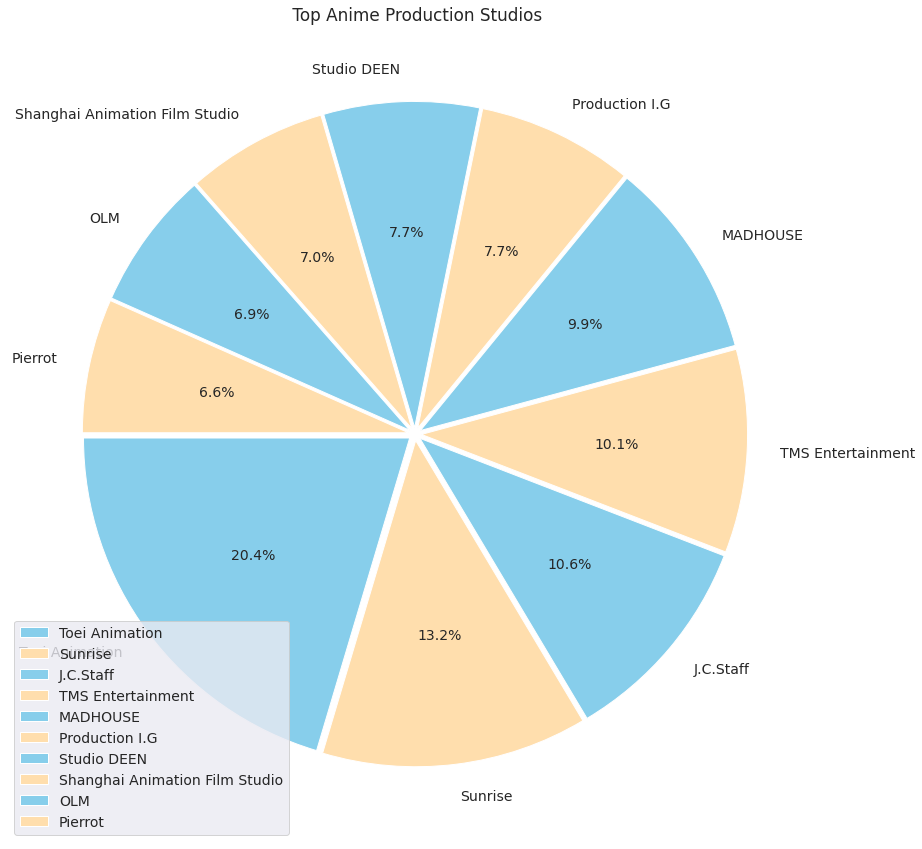

In [60]:
plt.figure(figsize=(30,15))
plt.title(" Top Anime Production Studios")
g = plt.pie(anime.Studio.value_counts()[1:11], explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02), labels=anime.Studio.value_counts()[1:11].index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Here is the distribution of all the 10 studio which released more Anime

#### Q4: ### Question 9
Which of the stats are impacting the *Total*-score the weakest.
To answer this question we are calculating the correlation of the different stats and plotting it as a heatmap.

In [66]:
corr = anime.iloc[:,3:10].corr()
corr

,Episodes,Rating,Release_year
Episodes,1.000000,0.002204,0.014260
Rating,0.002204,1.000000,0.292742
Release_year,0.014260,0.292742,1.000000


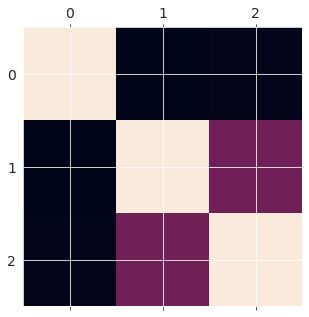

In [67]:
plt.matshow(corr)

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

We now Know Which Anime is more popular and which studio release more of the anime.

I have analyze various trend on Anime.
Ichoose this dataset from kaggle.com. we concluded that Anime has more movies than TV shows.
I have refered to the pandas notebook and visulization notes from zero to pandas project to finish this project.
I am excited to move forward in this journey of becoming a Data Analyst/Scientist.

In [70]:
import jovian

In [71]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ishit239/anime" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ishit239/anime


'https://jovian.ai/ishit239/anime'


## References and Future Work
https://www.kaggle.com/shivamb/netflix-shows(link to the dataset)
Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


I will work on couple of projects further.useful.

In [72]:
import jovian

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ishit239/anime" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ishit239/anime


'https://jovian.ai/ishit239/anime'